## Exercise 1

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *


In [2]:
img = cv.imread("images/boat.jpg", 0)

#otsu threshold
otsu = cv.threshold(img,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]
show_img("thresholded",otsu)

In [3]:
img = cv.imread("images/boat.jpg", 0)

# Apply Otsu thresholding
otsu = cv.threshold(img,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

# Find contours 
contours = cv.findContours(otsu, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

# Create a copy of the original image
img_copy = img.copy()

# Loop through the detected contours
for contour in contours:
    # Calculate the bounding box around the contour
    x, y, w, h = cv.boundingRect(contour)
    
    if w > 50 and h > 50:  # Filter out small regions
        # Draw the bounding box on the image
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
# Display the image with bounding boxes
show_img("Bounding box", img_copy)


## Exercise 2

In [4]:
def trackbar(x):
    pass

img = cv.imread('images/leaf.jfif',0)
    
    # Apply Otsu thresholding
otsu = cv.threshold(img,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

wn = "Morphology Effects"
cv.namedWindow(wn)
cv.createTrackbar("Size", wn, 0, 30, trackbar)

while True:
    # Retrieve size 
    size = cv.getTrackbarPos("Size", wn)
    if size < 1:
        size = 1

    kernel = np.ones((size, size), dtype=np.uint8)

    # Perform various morphological transformations
    erosion = cv.erode(otsu, kernel, iterations=1)
    dilation = cv.dilate(otsu, kernel, iterations=1)
    opening = cv.morphologyEx(otsu, cv.MORPH_OPEN, kernel, iterations=1)
    closing = cv.morphologyEx(otsu, cv.MORPH_CLOSE, kernel, iterations=1)

    # Concatenate the transformed images for display
    result = np.concatenate((erosion, dilation, opening, closing), axis=1)

    cv.imshow(wn, result)
    key = cv.waitKey(1) & 0xFF
    if key == 27:
        break

cv.destroyAllWindows()

## Exercise 3

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

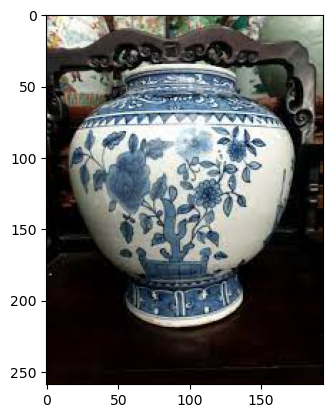

In [6]:
img = cv.imread('images/color_space/porcelain3.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
plt.imshow(img)
plt.show()

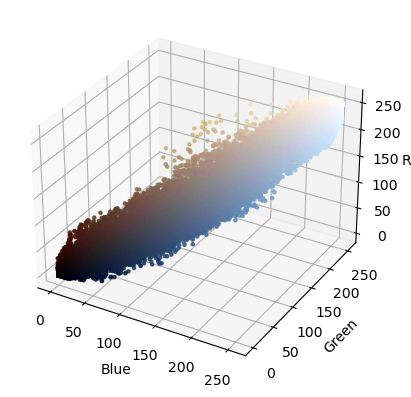

In [7]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

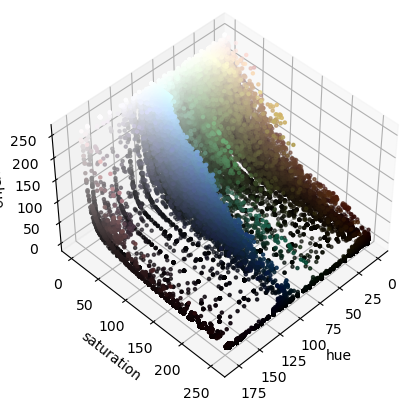

In [8]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")


axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")

axis.view_init(45, 45)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

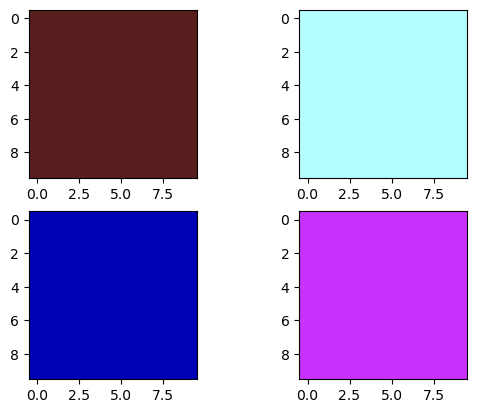

In [26]:
blue_low = (90, 30, 30)
blue_high = (180, 255, 255)
white_low = (0, 0, 180)
white_high = (200, 50, 255)

lo_square_blue = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square_blue = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0
lo_square_white = np.full((10, 10, 3), white_low, dtype = np.uint8)/255.0
do_square_white = np.full((10, 10, 3), white_high, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(lo_square_blue)
plt.subplot(2, 2, 2)
plt.imshow(do_square_blue)
plt.subplot(2, 2, 3)
plt.imshow(lo_square_white)
plt.subplot(2, 2, 4)
plt.imshow(do_square_white)
plt.show()

In [27]:
def color_seg(img, color1_low, color1_high, color2_low, color2_high, smooth=True):
    """Args:
    img: source img
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    #HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #inrange
    mask1 = cv.inRange(img_hsv, color1_low, color1_high)
    mask2 = cv.inRange(img_hsv, color2_low, color2_high)
    
    # Combine the masks
    mask = cv.bitwise_or(mask1, mask2)
    
    #morphological operations
    mask = cv.dilate(mask, None, iterations = 2)
   
    
    return cv.bitwise_and(img_ori, img_ori, mask=mask)

imgs = []

for i in range(1,6):
    img = cv.imread('images\color_space\porcelain'+str(i)+'.jfif')
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high, white_low, white_high) for img in imgs]

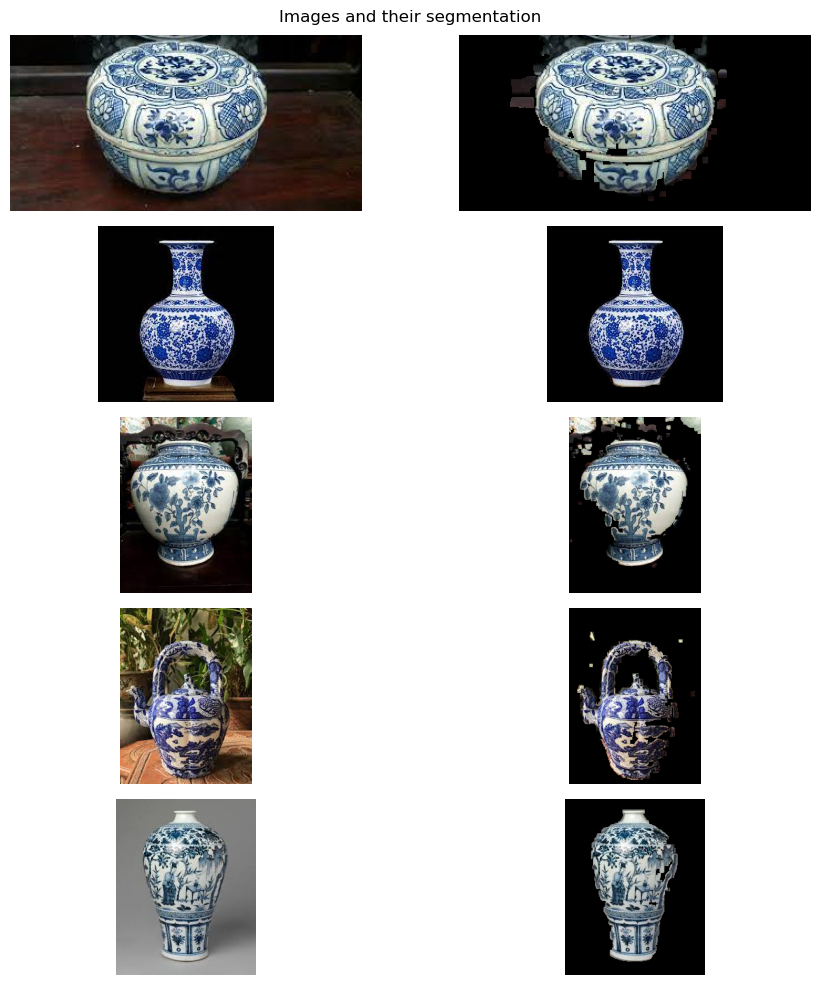

In [28]:
fig,ax = plt.subplots(5,2,figsize=(10,10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Images and their segmentation")
plt.tight_layout()
plt.show()